# Nuages de points
Explorez les relations entre les variables en utilisant des représentations graphiques avancées.

### Chargement et examen des données
Nous travaillerons avec un ensemble de données synthétiques sur **les coûts d'assurance** afin de comprendre pourquoi certains clients paient plus cher que d'autres.

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [5]:
insurance_filepath = "insurance.csv"
insurance_data = pd.read_csv(insurance_filepath)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

### Création de nuages de points simples
Pour créer un simple nuage de points :
- Axe horizontal (x) : bmi
- Axe vertical (y) : charges

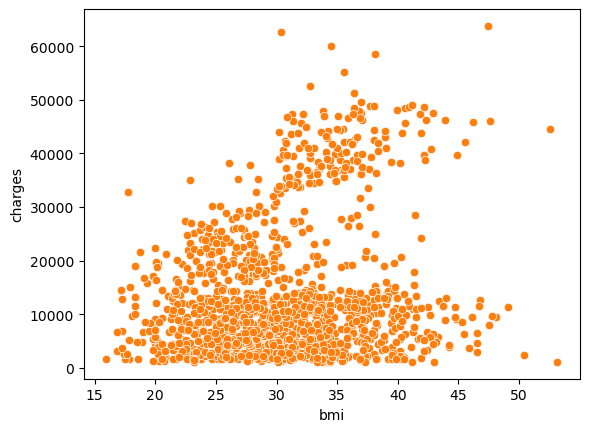

In [10]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.show()

Le graphique ci-dessus suggère que l’indice de masse corporelle (IMC) et les frais d’assurance sont positivement corrélés : les clients avec un IMC élevé ont tendance à payer davantage. (Cette observation a du sens, car **un IMC élevé est généralement associé à un risque accru de maladies chroniques.)**

---

Pour vérifier la force de cette relation, vous pourriez ajouter une **ligne de régression**, ou la ligne qui s’ajuste le mieux aux données. Nous faisons cela en remplaçant la commande par ***sns.regplot***.

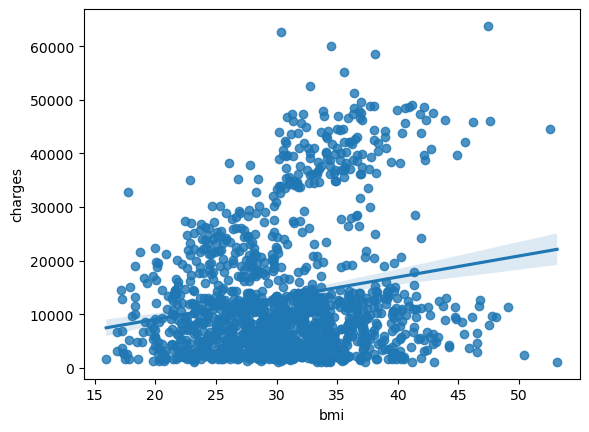

In [13]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.show()

## Nuages de points colorés
Nous pouvons utiliser des nuages de points pour afficher les relations entre (non pas deux, mais...) trois variables ! Une méthode consiste à colorer les points.

**Par exemple**, pour comprendre comment le fait de fumer affecte la relation entre l’IMC et les frais d’assurance, nous pouvons colorer les points en fonction de smoker, et tracer les deux autres colonnes (bmi, charges) sur les axes.

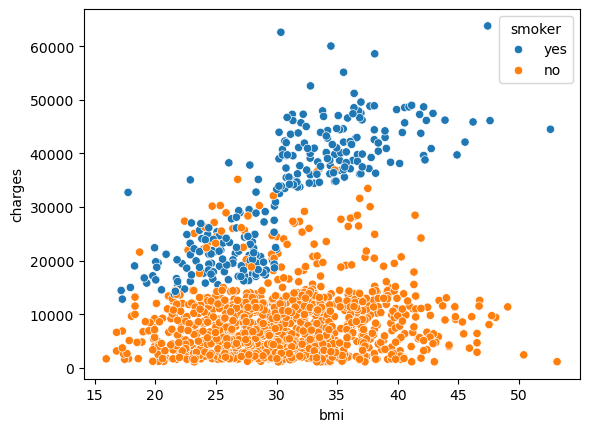

In [17]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])
plt.show()

Ce nuage de points montre que bien que les non-fumeurs aient tendance à payer légèrement plus avec un IMC croissant, les fumeurs paient BEAUCOUP plus.

Pour souligner davantage ce fait, nous pouvons utiliser la commande ***sns.lmplot*** pour ajouter deux lignes de régression, correspondant aux fumeurs et aux non-fumeurs. (Vous remarquerez que la ligne de régression pour les fumeurs a une pente beaucoup plus raide, par rapport à celle des non-fumeurs !)

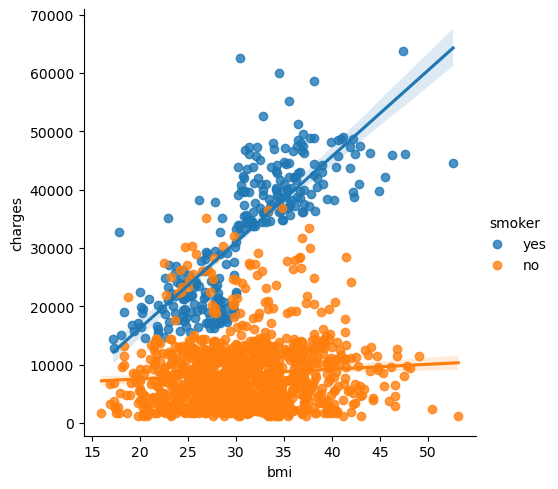

In [20]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)
plt.show()

La commande sns.lmplot ci-dessus fonctionne légèrement différemment des commandes que vous avez apprises jusqu’ici :
- Au lieu d’utiliser x=insurance_data['bmi'] pour sélectionner la colonne bmi, nous utilisons x="bmi" pour spécifier uniquement le nom de la colonne.
- De même, y="charges" et hue="smoker" contiennent également les noms des colonnes.
- Nous spécifions l’ensemble de données avec data=insurance_data.

---

## Nuages de points catégoriels
Enfin, il existe un autre type de graphique que vous allez découvrir, qui peut sembler légèrement différent de ce à quoi vous êtes habitué. Généralement, nous utilisons des nuages de points pour mettre en évidence la relation entre deux variables continues (comme « bmi » et « charges »). Cependant, nous pouvons adapter la conception du graphique pour inclure une variable catégorielle (comme « smoker ») sur l’un des axes principaux. Nous appellerons ce type de graphique un nuage de points catégoriel, et nous le construisons avec la commande sns.swarmplot.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


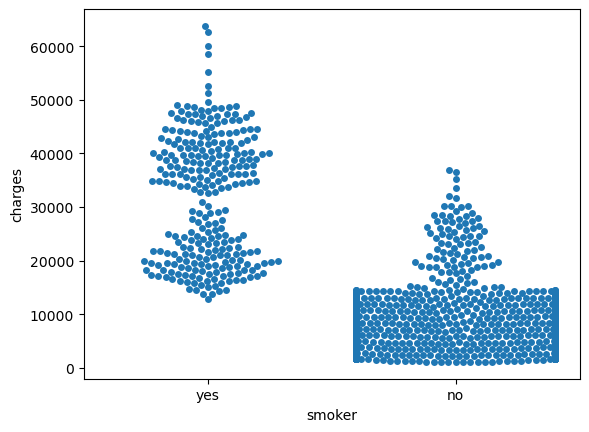

In [23]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])
plt.show()

Parmi les observations, ce graphique montre que :
- En moyenne, les non-fumeurs paient moins que les fumeurs.
- Les clients qui paient le plus sont des fumeurs ; tandis que ceux qui paient le moins sont des non-fumeurs.

---


# Exercice

Scénario :
Vous travaillez pour un grand producteur de bonbons, et votre objectif est de rédiger un rapport que votre entreprise pourra utiliser pour guider la conception de son prochain produit. Peu après le début de vos recherches, vous tombez sur un ensemble de données très intéressant contenant les résultats d'une enquête ludique visant à collecter les bonbons préférés.

In [27]:
# Chemin du fichier à lire
candy_filepath = "candy.csv"

# Remplissez la ligne ci-dessous pour lire le fichier dans une variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

# Imprimez les cinq premières lignes des données
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [29]:
# Filtrer les lignes spécifiques pour vérifier les valeurs

# Répondre à la question : Quel bonbon était le plus populaire parmi les répondants ?
# '3 Musketeers' ou 'Almond Joy' ?
print(candy_data[candy_data['competitorname'].isin(['3 Musketeers', 'Almond Joy'])])
# Répondre à la question : Quel bonbon a une teneur en sucre plus élevée ?
# 'Air Heads' ou 'Baby Ruth' ?
print(candy_data[candy_data['competitorname'].isin(['Air Heads', 'Baby Ruth'])])


   competitorname chocolate fruity caramel peanutyalmondy nougat  \
id                                                                 
1    3 Musketeers       Yes     No      No             No    Yes   
3      Almond Joy       Yes     No      No            Yes     No   

   crispedricewafer hard  bar pluribus  sugarpercent  pricepercent  winpercent  
id                                                                              
1                No   No  Yes       No         0.604         0.511   67.602936  
3                No   No  Yes       No         0.465         0.767   50.347546  
   competitorname chocolate fruity caramel peanutyalmondy nougat  \
id                                                                 
2       Air Heads        No    Yes      No             No     No   
4       Baby Ruth       Yes     No     Yes            Yes    Yes   

   crispedricewafer hard  bar pluribus  sugarpercent  pricepercent  winpercent  
id                                               

**Nuage de points**

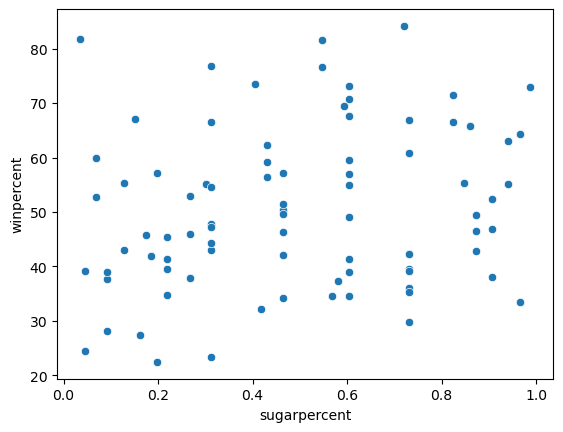

In [32]:
# Scatter plot montrant la relation entre 'sugarpercent' et 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.show()

Solution : Le nuage de points ne montre pas de forte corrélation entre les deux variables. Comme il n'y a pas de relation claire entre ces deux variables, cela nous indique que **la teneur en sucre n'a pas un rôle déterminant dans la popularité des bonbons.**

---

**Une ligne de régression à votre nuage de points**

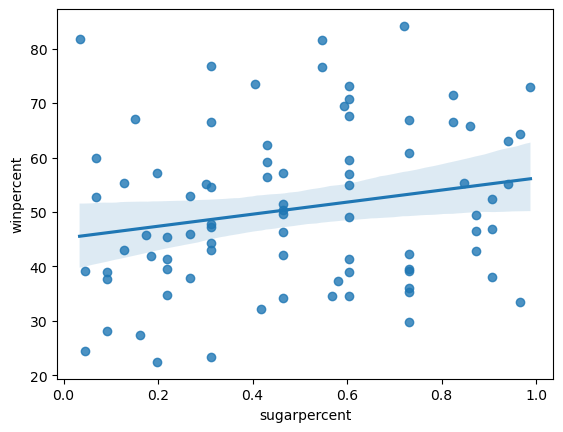

In [36]:
# Scatter plot with regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.show()

Solution : Étant donné que la ligne de régression a une pente légèrement positive, cela nous indique qu'il existe une corrélation légèrement positive entre la « winpercent » (popularité des bonbons) et la « sugarpercent » (teneur en sucre). Ainsi, **les gens ont une légère préférence pour les bonbons contenant relativement plus de sucre.**

---

**Nuage de points colorés**

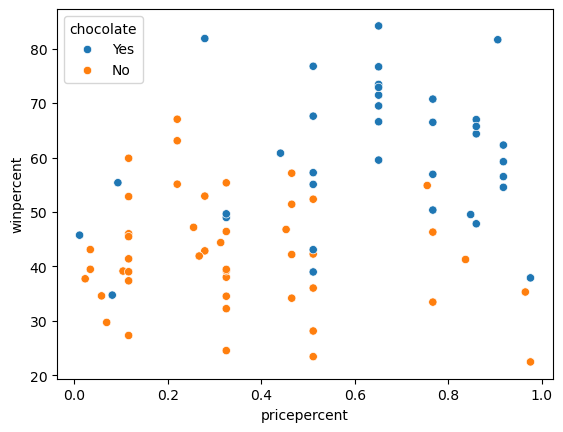

In [42]:
# Nuage de points montrant la relation entre 'pricepercent', 'winpercent' et 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])
plt.show()

**Examiner le chocolat avec des lignes de régressions**

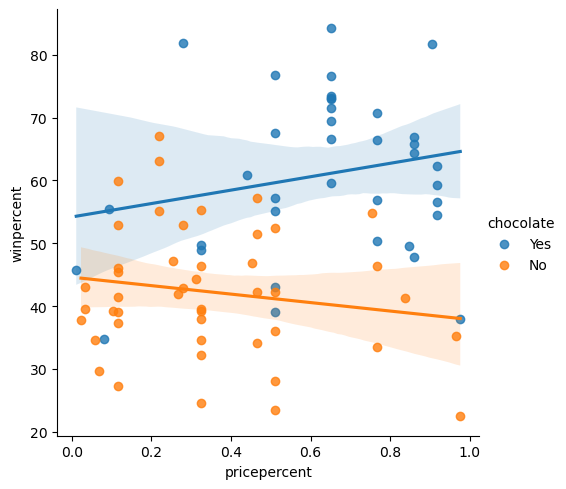

In [45]:
# Nuage de points avec lignes de régression montrant la relation entre 'pricepercent', 'winpercent', et 'chocolate'
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)
plt.show()

**Solution :** Commençons par la ligne de régression pour les bonbons au chocolat. Comme cette ligne a une pente légèrement positive, nous pouvons dire que les bonbons au chocolat plus chers ont tendance à être plus populaires (par rapport aux bonbons au chocolat relativement moins chers). De même, comme la ligne de régression pour les bonbons sans chocolat a une pente négative, nous pouvons dire que si les bonbons ne contiennent pas de chocolat, ils tendent à être plus populaires lorsqu'ils sont moins chers. 

Cependant, une note importante est que l'ensemble de données est assez petit, donc nous ne devrions pas accorder trop de confiance à ces modèles ! Pour renforcer la confiance dans les résultats, nous devrions ajouter davantage de bonbons à l'ensemble de données.

---

**Nuage de point catégoriel**

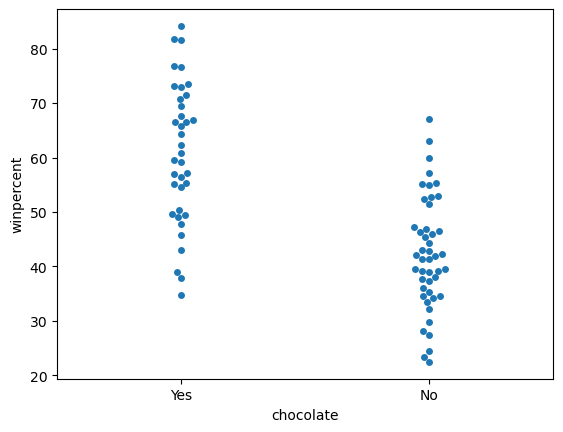

In [49]:
# Nuage de points montrant la relation entre 'chocolate' et 'winpercent'
sns.swarmplot(x='chocolate', y='winpercent', data=candy_data)
plt.show()

**Solution :**  
Dans ce cas, le nuage de points catégoriel est le graphique le plus approprié. Bien que les deux graphiques racontent l'histoire souhaitée, le graphique précédent transmet beaucoup plus d'informations, ce qui pourrait détourner l'attention du point principal.